<a href="https://colab.research.google.com/github/ShauryaK0303/TASK-1-SPAM-CLASSIFICATION/blob/main/LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**AIM**
a) Implement the User-User
collaborative filtering and suggest recommendation for the users.

b) Calculate Prediction for a particular user by using method of Cosine
similarity , Euclidean distance and Pearson correlation on user-user based
collaborative filtering.

#**INTRODUCTION**
User-User Collaborative Filtering (User-User CF) is a recommendation technique that identifies users with similar preferences to suggest items. The approach relies on the idea that if two users have rated several items similarly, they are likely to have similar tastes. By calculating the similarity between users using metrics like Cosine Similarity, Pearson Correlation, or Euclidean Distance, the method predicts ratings for unreviewed items based on the preferences of similar users.

#**THEORY**
User-User Collaborative Filtering is based on the assumption that similar users have similar preferences. It creates a user-item interaction matrix, where rows represent users, and columns represent items. To predict a user's rating for an item, the algorithm identifies similar users (neighbors) using similarity measures like Cosine Similarity, Pearson Correlation, or Euclidean Distance. The predicted rating is typically a weighted average of ratings provided by these neighbors

#**REPRESENTATION**
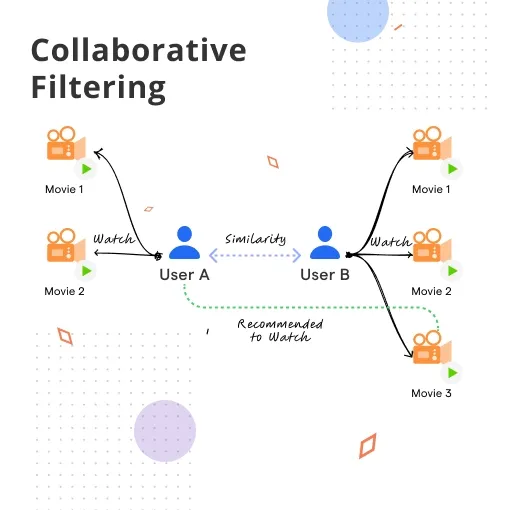

In [ ]:
#@title **CODE**
import pandas as pd

from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
from scipy.stats import pearsonr

import numpy as np

In [ ]:
movies_df= pd.read_csv('movies.csv')
ratings_df= pd.read_csv('ratings.csv')

In [ ]:
print(movies_df.head())
print(ratings_df.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [ ]:
user_item_matrix = ratings_df.pivot(index='userId', columns='movieId', values='rating')
print(user_item_matrix.head())

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     NaN     4.0     NaN     NaN     4.0     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5           4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     N

In [ ]:
user_item_matrix_filled = user_item_matrix.fillna(0)
# see the difference of cosine matrix
print(user_item_matrix_filled.head())



movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     0.0     4.0     0.0     0.0     4.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0

In [ ]:
user_similarity = cosine_similarity(user_item_matrix_filled)

user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

print(user_similarity_df)

userId       1         2         3         4         5         6         7    \
userId                                                                         
1       1.000000  0.027283  0.059720  0.194395  0.129080  0.128152  0.158744   
2       0.027283  1.000000  0.000000  0.003726  0.016614  0.025333  0.027585   
3       0.059720  0.000000  1.000000  0.002251  0.005020  0.003936  0.000000   
4       0.194395  0.003726  0.002251  1.000000  0.128659  0.088491  0.115120   
5       0.129080  0.016614  0.005020  0.128659  1.000000  0.300349  0.108342   
...          ...       ...       ...       ...       ...       ...       ...   
606     0.164191  0.028429  0.012993  0.200395  0.106435  0.102123  0.200035   
607     0.269389  0.012948  0.019247  0.131746  0.152866  0.162182  0.186114   
608     0.291097  0.046211  0.021128  0.149858  0.135535  0.178809  0.323541   
609     0.093572  0.027565  0.000000  0.032198  0.261232  0.214234  0.090840   
610     0.145321  0.102427  0.032119  0.

In [ ]:
user_predicted_ratings = pd.DataFrame(index=user_item_matrix.index, columns=user_item_matrix.columns)

In [ ]:
print(user_predicted_ratings.head())

movieId 1      2      3      4      5      6      7      8      9      10      \
userId                                                                          
1          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

movieId  ... 193565 193567 193571 193573 193579 193581 193583 193585 193587  \
userId   ...                                                                  
1        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4        ...    NaN    NaN    NaN    

In [ ]:
# Iterate over all users
for user in user_item_matrix.index:
    # Get the similarity scores for this user
    sim_scores = user_similarity_df[user]
    # Calculate the weighted sum of ratings for each item
    weighted_sum = sim_scores.values @ user_item_matrix_filled
    # Calculate the sum of similarity scores
    sim_sum = np.abs(sim_scores).sum()
    # Predict the ratings
    user_predicted_ratings.loc[user] = weighted_sum / sim_sum

print(user_predicted_ratings.head(2))


movieId    1         2         3         4         5         6         7       \
userId                                                                          
1        1.808175  0.831877  0.423003  0.027315  0.271766  1.026076  0.317491   
2           1.365  0.620288   0.15023  0.009878  0.154428  0.614357  0.122923   

movieId    8         9         10      ...    193565    193567    193571  \
userId                                 ...                                 
1        0.046305  0.080917  1.053528  ...  0.000247  0.000212  0.000282   
2        0.025785  0.025225  0.623624  ...  0.012876  0.011037  0.014716   

movieId    193573    193579    193581    193583    193585    193587    193609  
userId                                                                         
1        0.000282  0.000247  0.000282  0.000247  0.000247  0.000247  0.002937  
2        0.014716  0.012876  0.014716  0.012876  0.012876  0.012876  0.024795  

[2 rows x 9724 columns]


In [ ]:
def recommend_items(user_id, num_recommendations=10):
    # Get the predicted ratings for the user
    user_ratings = user_predicted_ratings.loc[user_id].sort_values(ascending=False)
    # Filter out items the user has already rated
    already_rated = user_item_matrix.loc[user_id].dropna().index
    recommendations = user_ratings.drop(already_rated)
    return recommendations.head(num_recommendations)


In [ ]:
print(recommend_items(1))

movieId
318     2.622414
589      2.06192
858     1.836914
2762    1.643315
4993    1.605043
150     1.566524
32      1.564531
7153     1.48395
5952    1.465234
588     1.459054
Name: 1, dtype: object
